$$\require{mhchem}$$

# Exam 1
# Pengfei Cheng
## AndrewID: pengfeic

# Exam 1 Problem 1 (60 pts)

 We have a liquid feed of A and B, with concentration of A 2M and concentration of B 3M, with a total flow rate of 0.1 m$^3$/s.  We are looking to optimize the conversion of the reaction: 
\begin{align*}
\ce{A + 2B -> C}
\end{align*}
You can assume in all cases the reaction is isothermal and the volume does not change with changes in the molar flow rates of the reactants.  The reaction is elementary and the rate constant is $k_1=0.1 dm^6/mol^2/s$



## First, find the maximum extent of reaction $\xi^{max}$ and write the rate equation $r$. (5 pts)

\begin{equation*}
    \xi_\mathrm{max} = \mathrm{min} \left (- \frac {C_\mathrm{A0}}{\alpha_A}, - \frac {C_\mathrm{B0}}{\alpha_B} \right) = \mathrm{min} \left (\frac{2}{1}, \frac{3}{2}\right) = 1.5 \ \mathrm{M}
\end{equation*}

\begin{equation*}
    r = k_1 C_\mathrm{A} C_\mathrm{B} ^ 2
\end{equation*}

## Now, find the extent of reaction for a steady state 100 L CSTR with the feed and flow rate from above. (10 pts)
<img src="E1P1B.png" alt="Drawing" style="width: 300px;"/>


In a steady state CSTR, the mole balacnce is as follows:

\begin{equation*}
    0 = F_\mathrm{in} - F_\mathrm{out} + rV
\end{equation*}

So we get:

\begin{align*}
    0 = C_\mathrm{in, A} v_0 + \alpha_\mathrm{A} r V - C_\mathrm{out, A} v_0 \\
    0 = C_\mathrm{in, B} v_0 + \alpha_\mathrm{B} r V - C_\mathrm{out, C} v_0 \\
    0 = C_\mathrm{in, B} v_0 + \alpha_\mathrm{B} r V - C_\mathrm{out, C} v_0
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import odeint

In [2]:
C0 = np.array ([2, 3, 0]).T # M
sc = np.array ([-1, -2, 1]).T # stoichiometric coefficients
v0 = 0.1 * 1000 # dm^3/s
k1 = 0.1 # dm^6/mol^2/s
V = 100 # L
F0 = C0 * v0 # mol/s

def SSC(Cout):
    'Steady State Concentration'
    CA, CB, CC = Cout
    r = k1 * CA * CB **2
    
    mb = C0 * v0 + sc * r * V - Cout * v0 # mole balance
    
    return mb

guess = [0, 1, 2]

sol1 = fsolve(SSC, guess)

xi1 = (sol1[0] - C0[0])/sc[0]

print ('The extent of reaction for the steady state CSTR is {:1.4f} M.'.format(xi1))

The extent of reaction for the steady state CSTR is 0.5393 M.


## Find the final extent of reaction for a 100 L PFR (10 pts)
<img src="E1P1C.png" alt="Drawing" style="width: 300px;"/>


In [3]:
FT0 = np.sum(F0)

def dFdV(F, V):
    FT = np.sum(F)
    v = v0 * (FT / FT0)
    
    C = F / v
    CA, CB, CC = C
    
    r = k1 * CA * CB ** 2
    
    rt = sc * r
    
    return rt

Vspan = np.linspace (0, 100)
sol2 = odeint (dFdV, F0, Vspan)

xi2 = (sol2[-1,0]/V - C0[0])/sc[0]

print ('The final extent of reaction for the PFR is {:1.4f} M.'.format(xi2))

The final extent of reaction for the PFR is 1.0029 M.


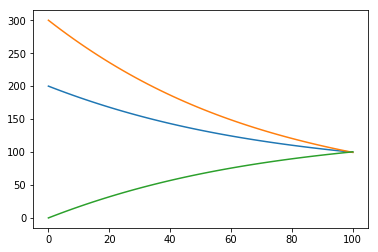

In [4]:
plt.plot(Vspan, sol2)
plt.show()

## Our operators tell us that they really like working with CSTR's and suggest that you use several CSTR's in series.  The total volume of CSTR's should equal 100 L.  For example, if you have 4 CSTR's, then  each will have a volume of 25 L.  The outflow of each CSTR is the same as the inflow to the next CSTR.  The extent of reaction for each reactor can be solved based on the extent of reaction from the previous reactor (sequentially).  Calculate the extent of reaction for the four reactor situation. (20 pts)
<img src="E1P1D.png" alt="Drawing" style="width: 500px;"/>


In [5]:
V2 = 25 # L

def SSC2(Cout, Cin, V):
    'Steady State Concentration'
    CA, CB, CC = Cout
    r = k1 * CA * CB **2
    
    mb = Cin * v0 + sc * r * V - Cout * v0 # mole balance
    
    return mb

sol31 = fsolve(SSC2, guess, (C0, V2))
sol32 = fsolve(SSC2, guess, (sol31, V2))
sol33 = fsolve(SSC2, guess, (sol32, V2))
sol34 = fsolve(SSC2, guess, (sol33, V2))

xi3 = (sol34[0] - C0[0])/sc[0]

print ('The extent of reaction for the steady state CSTR is {:1.4f} M.'.format(xi3))

The extent of reaction for the steady state CSTR is 0.6599 M.


## Plot the final extent of reaction for this approach from 1 to 10 reactors, and compare to the conversions from the CSTR and PFR examples above. (9 pts)

In [9]:
V3 = 10 # L

sol4 = [0] * 10

sol4[0] = fsolve(SSC2, guess, (C0, V3))

for i in range (1, 10):
    sol4[i] = fsolve (SSC2, guess, (sol4[i-1], V3))


    
xi4 = [0] * 10
for i in range(10):
    xi4[i] = (sol4[i][0] -C0[0])/sc[0]

plt.plot(list(range(1, 101, 10)), list(map(testf, range(1,11))))
plt.plot((0, 100), (xi1, xi1))
plt.plot((0, 100), (xi2, xi2))
plt.legend(['CSTRs in series','CSTR','PFR'])
plt.xlabel('Volume/L(as to the CSTRs in series)')
plt.ylabel('conversion')
plt.show()

UnboundLocalError: local variable 'i' referenced before assignment

In [7]:
def testf(x):
    V3 = 100/x # L

    sol4 = [0] * x

    sol4[0] = fsolve(SSC2, guess, (C0, V3))

    for i in range (1, x):
        sol4[i] = fsolve (SSC2, guess, (sol4[i-1], V3))
    return (sol4[i][0] -C0[0])/sc[0]

In [8]:
testf(10)

0.694013814108565

## We are considering adding a membrane to the PFR.  We have a few options.  For each, answer qualitatively if you think the conversion of A would increase, decrease, or stay the same, and why: (2 pts each)

- A membrane that allows A to be added slowly through the side of the PFR (w/ pure B inlet), total molar flow rate of A & B the same
 - 2
- A membrane that allows B to be added slowly through the side of the PFR (w/ pure A inlet), total molar flow rate of A & B the same
- A membrane that allows C to be removed continuously through the side of the PDF
 - Increase, because this dereases the total molar flowrate and increases the concentrations.

# Exam 1 Problem 2 (40 pts)

We are looking to design a liquid phase membrane PFR (V=10L) with three channels for the rection system:
\begin{align}
\ce{A + B -> 4C}, k_1=0.1/M/s\\
\ce{A + C -> 3D}, k_2=0.5/M/s
\end{align}
The inner channel contains a feed of pure A with a concentration of 1M and flow rate of 2 L/s. A is very large and cannot pass any membrane. B,C,D can pass the first membrane ($k_{b,1}'=0.2/s,k_{c,1}'=0.4/s,k_{d,1}'=0.5/s$) between the inner and outer sections.  C,D are very small and can also pass the outer membrane ($k_{c,2}'=0.5/s,k_{d,2}'=0.7/s$) between the middle and outer sections. You may assume the volumetric flow rates are constant.  The middle-channel is counter-current (flowing opposite to the inner and outer shells).
![img](./E1P2.png)


## Write the mol balance for each of the 9 species (A,B,C,D in inner, B,C,D in middle, C,D in outer), as well as the boundary conditions on the left side of the reactor (i.e. inlet of inner shell).  (20 pts)

\begin{align}
    \frac {dF_{A_{in}}} {dV_{in}} &= -r_1 -r_2 \\
    \frac {dF_{B_{in}}} {dV_{in}} &= -r_1 +R_{B_{im}} \\
    \frac {dF_{C_{in}}} {dV_{in}} &= 4r_1 - r2 +R_{C_{im}} \\
    \frac {dF_{D_{in}}} {dV_{in}} &= 3r_2 +R_{D_{im}} \\
    \frac {dF_{B_{m}}} {dV_{m}} &= -R_{B_{im}}\\
    \frac {dF_{C_{m}}} {dV_{m}} &= -R_{C_{im}} + R_{C_{mo}}\\
    \frac {dF_{D_{m}}} {dV_{m}} &= -R_{D_{im}} + R_{D_{mo}}\\
    \frac {dF_{C_{o}}} {dV_{o}} &= - R_{C_{mo}}\\
    \frac {dF_{D_{o}}} {dV_{o}} &= - R_{D_{mo}}\\
\end{align}

\begin{align*}
    r1 &= k_1 C_A C_B \\
    r2 &= k_2 C_A C_C
\end{align*}

\begin{align*}
    R_{B_{im}} &= a k'_{B,1} (C_{B_{m}}-C_{B_{in}}) \\
    R_{C_{im}} &= a k'_{C,1} (C_{C_{m}}-C_{C_{in}}) \\
    R_{D_{im}} &= a k'_{D,1} (C_{D_{m}}-C_{D_{in}}) \\
    R_{C_{mo}} &= a k'_{C,2} (C_{C_{o}}-C_{C_{m}}) \\
    R_{D_{mo}} &= a k'_{D,2} (C_{D_{o}}-C_{D_{m}}) \\
    a &= 4 / D \\
\end{align*}

The boundary condition is 

\begin{align*}
    F_{A_{in},0} &= 2 \mathrm{\ mol/s} \\
    F_{B_{in},0} = F_{C_{in},0}= F_{D_{in},0} &= 0 \\
    F_{B_{m},0} = F_{C_{m},0}= F_{D_{m},0} &= 1.5 \mathrm{\ mol/s} \\
    F_{C_{o},0} = F_{D_{o},0} &= 0 \\
\end{align*}

## Solve for and plot the concentration profiles for each species along the length of the reactor. (20 pts)